# An Introduction to Object-Oriented Programming

This session is the last in our series on fundamental programming
concepts. It is an introduction to the programming paradigm that
underpins Python, making it flexible and comparatively accessible to
people starting out with coding.

While the concepts discussed can feel a little abstract at times, they
will make ever more sense the more practical experience you have with
Python. This will help you understand how the packages you use function
and will hopefully lead you one day to create some sophisticated
programs yourself!

If you want to download the Jupyter notebook so that you can run the
code yourself, modify it, and generally have a play, you can download it
by clicking on the “Jupyter” link under “Other Formats” over on the
right-hand side below the page contents.

## Session Slides

Use the left ⬅️ and right ➡️ arrow keys to navigate through the slides
below. To view in a separate tab/window,
<a href="slides.html" target="_blank">follow this link</a>.

## A closer look at some of the basics

Here is a simple demonstration of how everything, down to individual
integers, is treated as an object. When we run the dir() function on an
integer and print the results, we can see all of the object attributes
and methods associated with it.

In [1]:
my_int = 5

print(dir(my_int))

['__abs__', '__add__', '__and__', '__bool__', '__ceil__', '__class__', '__delattr__', '__dir__', '__divmod__', '__doc__', '__eq__', '__float__', '__floor__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getnewargs__', '__getstate__', '__gt__', '__hash__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__le__', '__lshift__', '__lt__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rlshift__', '__rmod__', '__rmul__', '__ror__', '__round__', '__rpow__', '__rrshift__', '__rshift__', '__rsub__', '__rtruediv__', '__rxor__', '__setattr__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__truediv__', '__trunc__', '__xor__', 'as_integer_ratio', 'bit_count', 'bit_length', 'conjugate', 'denominator', 'from_bytes', 'imag', 'is_integer', 'numerator', 'real', 'to_bytes']

To see which are attributes and which are methods, you can run the
following code. We won’t run it here, because it produces quite a long
list!

In [2]:
for name in dir(my_int):
    item = getattr(my_int, name)
    if callable(item):  # if an item is callable, i.e. you can "do" something with it, it is a method
        print(f"{name} -> method")
    else:
        print(f"{name} -> attribute") # otherwise, it is an attribute

Methods and attributes that are surrounded by double underscores are
ones that are used “behind the scenes” to help objects behave in a
certain way (this exhibits the principle of Abstraction mentioned in the
presentation). The ones without are the ones that you would call
directly when working with the objects.

By now, you are likely to have come across operations that can be used
to transform your data by tacking them onto the end of your variable
name. These are *methods* belonging to that variable’s object.

In [3]:
# Here we are calling the "append" method of the list class.

icb_list = ['QRL','QNQ','QU9','QSL'] # a list object

icb_list.append('QNX') # calling the method and passing a parameter

print(icb_list)

['QRL', 'QNQ', 'QU9', 'QSL', 'QNX']

If we apply the function dir() to our variable `icb_list`, we can see
that “append” is one of the methods belonging to the list class.

In [4]:
print(dir(icb_list))

['__add__', '__class__', '__class_getitem__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']

**Remember**: Functions precede the variable `function(my_variable)`,
whereas methods are the ones that come after the variable
`my_variable.method()`.

Functions are not tied to a particular object class (for example,
`print()` can be applied to most things), while methods are bound up
with particular object classes (for example, the method `pop` is
associated with lists, but not with integers).

The brackets that come after methods will often contain parameters that
determine *how* the method is applied to the variable. This can be as
simple as saying what we want to append to a list, as in the above
example, or they can be as complex as the hyperparameters used to
fine-tune a machine learning model.

To access an *attribute*, you simply write `my_variable.attribute`.
Below is an example of accessing the “numerator” and “denominator”
attributes of an integer. In Python, integers have these to enable
consistency when working with rational numbers, i.e. fractions.

In [5]:
print(my_int.numerator)
print(my_int.denominator)

5
1

$\frac{5}{1} = 5$

When you start working with machine learning models in Python, you will
often want to access attributes such as `coef_` (regression) and
`feature_importances_` (decision tree algorithms).

Now let’s move onto how we create our own classes.

## The Anatomy of a Class

Let us first of all look at a simple class to see how it is structured
as a whole. Then we will look at each element in turn.

In [6]:
class HealthProfessional:

  daily_capacity = 7.5

  def __init__(self, assignment_number, division, department):
    self.assignment_number = assignment_number                 
    self.division = division              
    self.department = department                              

  def treat_patient(self,patient_name):
    print(f'Health professional {self.assignment_number} treated patient {patient_name}')

The line begins the definition of the class. It starts with the `class`
keyword, followed by the class name and a colon. By convention, classes
in Python begin with a capital letter.

In [7]:
class HealthProfessional:

The next element is a *class attribute*, that is to say and attribute
where the value will initially be the same for all objects created from
that class. All of my health professionals have a default
`daily_capacity` of 7.5 working hours per day. Class attributes sit just
below the class name with one indent. Class attributes are **optional**.

In [8]:
class HealthProfessional:
  
  daily_capacity = 7.5

Next comes the *constructor* method, which goes by the name of
`__init__`. The double underscores (a so-called “dunder” method)
indicate that it is a method that remains internal to the object i.e. it
is not something that is accessed by the end user.

The constructor method defines what happens when an object instance is
created (instantiated). It determines which attributes require values to
be passed to the object at instantiation and can also trigger some
methods to be execute automatically.

It is written much in the same way as defining a function, starting with
the keyword `def`. The first argument of the function is *always* `self`
and is followed by arguments representing each of the object attributes.

Below that, each object attribute is bound to `self` with the
`self.attribute` syntax and the `= attribute` syntax means that the
corresponding value that gets passed to the object at instantiation will
be assigned to that attribute.

In [9]:
  def __init__(self, assignment_number, division, department):
    self.assignment_number = assignment_number                 
    self.division = division              
    self.department = department    

#### Some quick notes on `self`

-   `self` stores the instance of each object within the computer’s
    memory.
-   whenever we define a class method, we include `self` because we want
    to run this method *in relation to this instance* when we call it.
-   whenever we define an object attribute, we include `self` because we
    want to be able access the attribute value that *belongs to this
    instance*.

Now, returning to the definition of a class, we come to the *class
method*.

It is again defined just like a normal function, and this time we can
give it whatever name we like. The first argument is *always* `self`,
which is followed by any other arguments relevant to the method. In our
example, we want to pass a `patient_name` to the HealthProfessional
object so that it knows which patient it is being asked to treat.

In [10]:
  def treat_patient(self,patient_name):
    print(f'Health professional {self.assignment_number} treated patient {patient_name}')

Now we can have a look at our HealthProfessional class in action.

First of all, we need to instantiate a HealthProfessional object. We
need to assign it to a variable name so that we can easily refer to the
object later on.

In [11]:
doctor_duggee = HealthProfessional(
  assignment_number = 12345,          # writing out the argument names is optional
  division = "A",
  department= "Surgery"
)

We can use the `.treat_patient` method:

In [12]:
doctor_duggee.treat_patient("Betty")

Health professional 12345 treated patient Betty

We can access the object’s object attributes:

In [13]:
print(f'Health Professional {doctor_duggee.assignment_number} works in the {doctor_duggee.department} department')

Health Professional 12345 works in the Surgery department

And we can access the class attribute:

In [14]:
doctor_duggee.daily_capacity

7.5

It is also very easy to update an object’s attribute values. Compare
this with updating the values in a `dict`, which can be quite
[fiddly](https://www.geeksforgeeks.org/python-replace-dictionary-value-from-other-dictionary/).

In [15]:
doctor_duggee.department = 'Medicine for Older Persons'
doctor_duggee.division = 'C'

print(f'Health Professional {doctor_duggee.assignment_number} works in the {doctor_duggee.department} department in Division {doctor_duggee.division}')

Health Professional 12345 works in the Medicine for Older Persons department in Division C

Class attribute values can be updated at object level in the same way.
This change won’t affect new objects created from the class. Think of
class attributes as holding a common *default* value.

In [16]:
doctor_duggee.daily_capacity = 8
print(f'Duggee\'s daily capacity: {doctor_duggee.daily_capacity} hours.')

Duggee's daily capacity: 8 hours.

## Inheritance

One of the main strengths of object-oriented programming is the ability
to create *child* classes from other classes (the original, *parent*
classes). This allows us to create classes that modify or extend the
data (attributes) and behaviours (methods) of the parent class, without
altering the parent class itself. Multiple child classes can be created
which share the attributes and methods *consistently*, but extend or
modify them in their own way.

Let us have a look at how a child class gets created from the parent
class. Again, we will start off with the child class written out in full
so that you can see how it would look. Then we will go through it line
by line.

We are going to create “Doctor” and “Nurse” child classes of the
`HealthProfessional` parent class. They will inherit the attributes and
methods of the `HealthProfessional` class, but extend them in their own
way.

In [17]:
class Doctor(HealthProfessional):
    def __init__(self,assignment_number,division,department,seniority):
        self.seniority = seniority
        super().__init__(assignment_number,division,department)

    def discharge_patient(self,patient_name):
        print(f'Doctor {self.assignment_number} discharged patient {patient_name}')


First of all, when defining a child class, we start off with the keyword
`class` followed by the name of the child class, followed by the name of
the parent class in brackets, ending with a colon.

In [18]:
class Doctor(HealthProfessional):

Then, with one indentation, we write the constructor method, just as we
did with the parent class. Remember, we must always enter `self` as the
first argument. Then we need to enter the names of the attributes that
the child class will inherit from the parent, followed by any new object
attributes. In the second line, the any new object attributes are bound
to `self`.

In [19]:
    def __init__(self,assignment_number,division,department,seniority):
        self.seniority = seniority

Below any new attributes, we enter a line that draws down any methods
and attributes from the parent class. `super()` is a function that calls
the constructor function from the parent class.

In [20]:
        super().__init__(assignment_number,division,department)

Note that you do not need to refer to any methods or *class* attributes
here. They automatically get replicated by the super() method. The only
elements that you need to explicitly mention are the *object* attributes
defined in the parent class.

Remember: **Class** attributes are the ones that have “default” values
that are common to all objects created from a class. In our
`HealthProfessional` example, this was `daily_capacity`. They are
written just under the class name and are not bound to `self`.
**Object** attributes receive their values when an object is
instantiated and are specific to that object. They are bound to `self`.

Last in our example is the definition of any new methods that are
specific to the *child* class. `Doctor` objects will be able to treat
patients with the inherited `.treat_patient()` method, but we are also
going to give them the ability to discharge patients with the
`.discharge_patient()` method.

As with the `.treat_patient()` method in the parent class, we use the
`def` keyword, followed by the name of the method for the child class,
`self` as the first argument, and the name of any variable that we want
to pass to the method, in this case the name of the patient we want to
discharge.

In [21]:
    def discharge_patient(self,patient_name):
        print(f'Doctor {self.assignment_number} discharged patient {patient_name}')

Let’s create an object instance of the `Doctor` class and try out the
methods and attributes.

In [22]:
doctor_peppa = Doctor(
  999999,
  "B",
  "Ophthalmology",
  "Consultant"
)

In [23]:
print(f'Assignment number: {doctor_peppa.assignment_number}')
print(f'Division: {doctor_peppa.division}')
print(f'Department: {doctor_peppa.department}')
print(f'Seniority: {doctor_peppa.seniority}')

Assignment number: 999999
Division: B
Department: Ophthalmology
Seniority: Consultant

Note that we can still retrieve the `daily_capacity` attribute, which
was defined in the parent class `HealthProfessional`

In [24]:
doctor_peppa.daily_capacity

7.5

However, we can prove that Doctor Peppa is a `Doctor` object and not a
`HealthProfessional` object by using Python’s type() function

In [25]:
type(doctor_peppa)

__main__.Doctor

We can also test Doctor Peppa’s methods:

In [26]:
doctor_peppa.treat_patient("Suzy Sheep")

Health professional 999999 treated patient Suzy Sheep

**Did you notice how it said “Health professional”? This was actually
unintentional, but it neatly demonstrates how the `.treat_patient()`
method has been inherited from the parent class (because the text of the
statement wasn’t amended when the child class was created).**

In [27]:
doctor_peppa.discharge_patient("Suzy Sheep")

Doctor 999999 discharged patient Suzy Sheep

What happens if Doctor Duggee tries to discharge a patient? Try
uncommenting the Python below and running the cell.

In [28]:
# doctor_duggee.discharge_patient("Happy")

We get an error, because `doctor_duggee` is a `HealthProfessional`
object, which does not contain the `.discharge_patient()` method.

If you want to turn `doctor_duggee` into a `Doctor` object, you need to
instantiate him as such.

In [29]:
doctor_duggee = Doctor(
  assignment_number = 12345,
  division = "A",
  department= "Surgery",
  seniority="Resident"
)

type(doctor_duggee)

__main__.Doctor

Let’s quickly define the `Nurse` child class of `HealthProfessional` to
demonstrate how different child classes can share the same inherited
characteristics, but still have their own.

Instead of `seniority`, `Nurse` objects will have `band` and `role`
attributes, and instead of `.discharge_patient()` the method
`.take_readings()`.

In [30]:
class Nurse(HealthProfessional):
    def __init__(self,assignment_number,division,department,band,role):
        self.band = band
        self.role = role
        super().__init__(assignment_number,division,department)

  # Adding a new method to the child class
    def take_readings(self,patient_name):
        print(f'Nurse {self.assignment_number} took the vital signs readings of {patient_name}')

In [31]:
nurse_tag = Nurse(
  assignment_number = 10101,
  division = "A",
  department = "Cancer Care",
  band = "5",
  role = "Staff Nurse"
)

print(f'Assignment number:  {nurse_tag.assignment_number}')
print(f'Division: {nurse_tag.division}')
print(f'Department: {nurse_tag.department}')
print(f'AfC Band: {nurse_tag.band}')
print(f'Role: {nurse_tag.role}')
print(f'Daily Capacity: {nurse_tag.daily_capacity}')

nurse_tag.take_readings("Roly")

Assignment number:  10101
Division: A
Department: Cancer Care
AfC Band: 5
Role: Staff Nurse
Daily Capacity: 7.5
Nurse 10101 took the vital signs readings of Roly

There is also a function that can check whether an object belongs to a
specified class. (This is particularly useful for checking data types
when a specific type needs to be enforced, given that every variable is
treated as an object belonging to a particular class. This data type
enforcement doesn’t happen by default in Python since it is a
dynamically-typed language. Leaving this up to Python could lead to a
mismatch of data types, which could lead to errors further down the
line).

In [32]:
isinstance(nurse_tag,Nurse)

True

In [33]:
# Imagine we wanted to ensure that AfC bands always get stored as strings
# for consistency since they can include alphanumeric values (e.g. "8a") as
# well as purely numeric values (e.g. "6")

my_input = 7 # this will be interpreted as an integer

if isinstance(my_input,str):
  print('Valid input')
else:
  print('Invalid input: this field only accepts text strings')

Invalid input: this field only accepts text strings

Those are the fundamentals of how to create classes and objects. Let’s
have a look at something a *bit* more advanced to give you an idea of
something you might want to create for a team of analysts.

## A practical example

Below is an example of how we might create an standard SCW chart
template for different kinds of charts using a class. **The string and
Boolean values in the constructor method are default values that can be
overwritten by any values passed to the object at instantiation.**

In [34]:
import matplotlib.pyplot as plt

class SCWPlot:
    def __init__(self, x_data, y_data, title="SCW Plot", xlabel="X-axis", ylabel="Y-axis", grid=True):
        self.x_data = x_data
        self.y_data = y_data
        self.title = title
        self.xlabel = xlabel
        self.ylabel = ylabel
        self.grid = grid
        # Colour palette based on SCW colours
        self.palette = ['#1C355E', '#00A499', '#78BE20', '#005EB8', '#AE2573', '#00A9CE']

    # This part is an method internal to the class. It is not accessed by users, but helps to standardise
    # the methods relating to each type of chart. By convention, these internal methods begin with an underscore.
    def _setup_plot(self):
        plt.figure(figsize=(8, 5))
        plt.title(self.title)
        plt.xlabel(self.xlabel)
        plt.ylabel(self.ylabel)
        plt.grid(visible=True,which='major',axis='both')
        plt.tight_layout()

    # The two methods below are each for a different kind of chart that the user can plot. They both make use of
    # the ._setup_plot() to determine certain shared, consistent characteristics.
    def plot_line(self, linestyle='-', marker='o'):
        self._setup_plot()
        plt.plot(self.x_data, self.y_data, color=self.palette[0], linestyle=linestyle, marker=marker)
        plt.show()

    def plot_bar(self):
        self._setup_plot()
        plt.bar(self.x_data, self.y_data, color=self.palette)
        plt.show()

Then we will create a very simple dataset to use for testing the use of
our class.

In [35]:
x = ['A', 'B', 'C', 'D', 'E']
y = [5, 7, 3, 8, 6]

Now we can instantiate an `SCWPlot` object and call the two chart type
methods to produce charts.

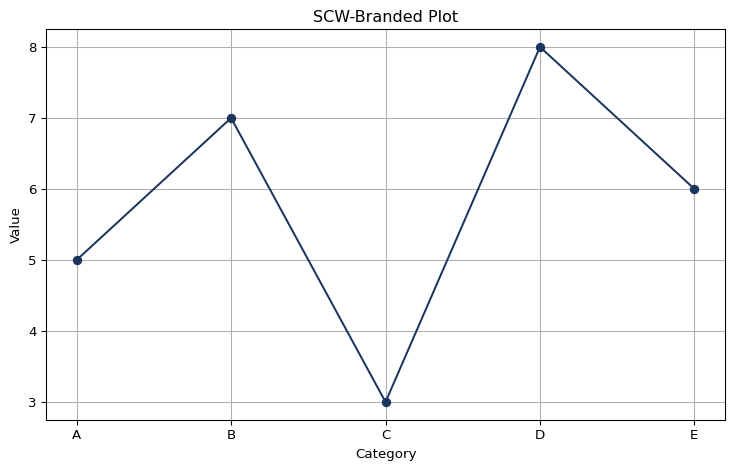

In [36]:
plot = SCWPlot(x, y, title="SCW-Branded Plot", xlabel="Category", ylabel="Value")

plot.plot_line()

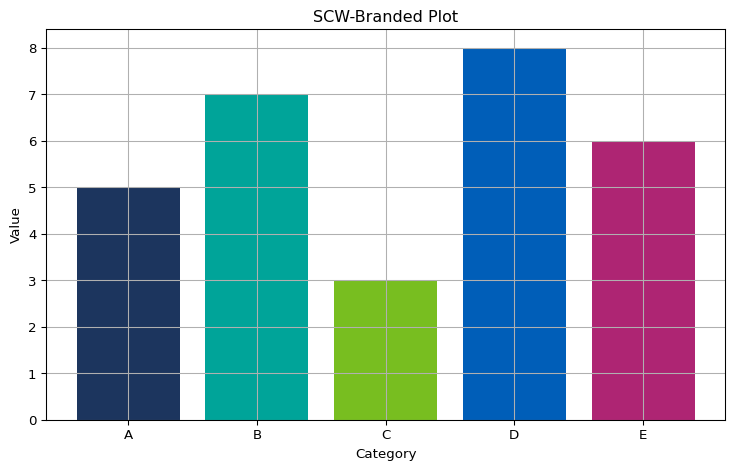

In [37]:
plot.plot_bar()

As you can see, it becomes easy for the user to switch between different
kinds of plots while maintaining a standard colour scheme and chart
size.

In reality, you would not have all of the implementation code (i.e. the
code written to create the class) in your script or notebook. This would
stored in a separate Python file and the class would be imported into
the script. In a future session we will talk about this and creating our
own packages.

#### Simple maintenance and extensibility

Creating standardised functions as methods of a class helps to simplify
maintaining and extending functionality. In the example above, things
like the colour palette and figure size are defined once and these get
cascaded to the methods relating to individual chart types, so they only
need to be edited once. Furthermore, it is easy for a colleague to add
another chart type (e.g. horizontal bar) with four lines of code,
without necessarily having to understand in detail how the rest of the
class has been constructed. This example produces relatively simple
charts, but there is the potential to create a class that consistently
produces timeseries charts with a preferred x-axis layout (something
that can be quite fiddly to perfect!).

While this class can be extended by adding more chart type methods, can
you think of a possible reason for creating a child class from it?

## Exercises

1.  How do you check what class a variable is?

> **Solution**
>
> ``` python
> my_variable = 5
>
> type(my_variable)
> ```
>
>     int

1.  How would you check whether the value of the variable in the
    previous solution is an integer?

> **Solution**
>
> ``` python
> isinstance(my_variable,int)
> ```
>
>     True

1.  Which function can be used to display all of the methods and
    attributes belonging to an object?

> **Solution**
>
> ``` python
> dir(my_variable)
> ```
>
>     ['__abs__',
>      '__add__',
>      '__and__',
>      '__bool__',
>      '__ceil__',
>      '__class__',
>      '__delattr__',
>      '__dir__',
>      '__divmod__',
>      '__doc__',
>      '__eq__',
>      '__float__',
>      '__floor__',
>      '__floordiv__',
>      '__format__',
>      '__ge__',
>      '__getattribute__',
>      '__getnewargs__',
>      '__getstate__',
>      '__gt__',
>      '__hash__',
>      '__index__',
>      '__init__',
>      '__init_subclass__',
>      '__int__',
>      '__invert__',
>      '__le__',
>      '__lshift__',
>      '__lt__',
>      '__mod__',
>      '__mul__',
>      '__ne__',
>      '__neg__',
>      '__new__',
>      '__or__',
>      '__pos__',
>      '__pow__',
>      '__radd__',
>      '__rand__',
>      '__rdivmod__',
>      '__reduce__',
>      '__reduce_ex__',
>      '__repr__',
>      '__rfloordiv__',
>      '__rlshift__',
>      '__rmod__',
>      '__rmul__',
>      '__ror__',
>      '__round__',
>      '__rpow__',
>      '__rrshift__',
>      '__rshift__',
>      '__rsub__',
>      '__rtruediv__',
>      '__rxor__',
>      '__setattr__',
>      '__sizeof__',
>      '__str__',
>      '__sub__',
>      '__subclasshook__',
>      '__truediv__',
>      '__trunc__',
>      '__xor__',
>      'as_integer_ratio',
>      'bit_count',
>      'bit_length',
>      'conjugate',
>      'denominator',
>      'from_bytes',
>      'imag',
>      'is_integer',
>      'numerator',
>      'real',
>      'to_bytes']

1.  How do you access an object’s attributes? What is the syntax?

> **Solution**
>
> `object.attribute`
>
> ``` python
> my_variable.numerator
> ```
>
>     5

1.  How do you call an object’s methods? What is the syntax?

> **Solution**
>
> `object.method()`
>
> ``` python
> my_variable.is_integer()
> ```
>
>     True

1.  Create a class called “Patient” with the characteristics below. You
    may wish to refer back to previous sessions on core programming
    concepts for guidance.

-   A class attribute called “bed_space” and assign it the value 1
-   Object attributes for “patient_number” and “diagnosis”, values for
    which will be assigned at instantiation, and “cured” which has the
    default value of `False` as well as “admitted” with the default
    value of `True`
-   A method called “get_well” which updates the “cured” attribute to
    `True` and prints a statement that returns the “patient_number” and
    the “diagnosis” that the patient has been cured of. (Hint: you will
    need to use an f-string with the attributes embedded in the
    statement).
-   A method called “get_discharged” which checks whether the patient
    has been cured and if this is `True`, prints a statement to say that
    the patient has been discharged and sets “admitted” to `False`.
    Othwerwise, it prints a statement to say that the patient is not
    ready to be discharged.

> **Solution**
>
> ``` python
> class Patient:
>
>   bed_space = 1
>
>   def __init__(self,patient_number,diagnosis):
>     self.patient_number = patient_number
>     self.diagnosis = diagnosis
>     self.cured = False
>     self.admitted = True
>
>   def get_well(self):
>     self.cured = True
>     print(f'Patient {self.patient_number} has been cured of {self.diagnosis}')
>   
>   def get_discharged(self):
>     if self.cured == True:
>       print(f'Patient {self.patient_number} has been discharged')
>       self.admitted = False
>     else:
>       print(f'Patient {self.patient_number} is not ready to be discharged')
> ```

1.  Instantiate a Patient object with a “patient_number” and
    “diagnosis”. Try discharging the patient before they have been
    cured, then call the `get_well` method and try discharging the
    patient again.

> **Solution**
>
> ``` python
> my_patient = Patient(patient_number='12345',diagnosis='acute tummy ache')
>
> my_patient.get_discharged()
>
> my_patient.get_well()
>
> my_patient.get_discharged()
> ```
>
>     Patient 12345 is not ready to be discharged
>     Patient 12345 has been cured of acute tummy ache
>     Patient 12345 has been discharged

1.  With the Patient object you created, how would you access the
    “admitted” attribute to check whether they are still an inpatient?

> **Solution**
>
> ``` python
> my_patient.admitted
> ```
>
>     False

1.  Create a child class called “SurgeryPatient” that inherits the
    methods and attributes from `Patient`. Add an attribute called
    “theatre” to store the name of the operating theatre that gets
    assigned when the object is created and a method that checks whether
    the patient has been cured or not. When `False`, the method prints a
    message requesting that the patient be transferred to the `theatre`,
    when `True` the method prints a message to say that the patient can
    proceed to discharge.

> **Solution**
>
> ``` python
> class SurgeryPatient(Patient):
>   def __init__(self, patient_number, diagnosis, theatre):
>     self.theatre = theatre
>     super().__init__(patient_number, diagnosis)
>
>   def theatre_call(self):
>     if self.cured == False:
>       print(f'Please transfer patient {self.patient_number} to theatre {self.theatre}')
>     else:
>       print(f'Patient {self.patient_number} is now ready for discharge')
> ```

1.  Instantiate a `SurgeryPatient` object, test whether the attributes
    and methods have been inherited from the `Patient` class, and test
    the `.theatre_call()` method. Your solution doesn’t have to match
    exactly. Just be sure that you are able to test each element of the
    class.

> **Solution**
>
> ``` python
> my_surgery_patient = SurgeryPatient(patient_number=54321,diagnosis='broken leg',theatre='11F')
>
> print(f'This patient occupies {my_surgery_patient.bed_space} bed')
>
> my_surgery_patient.get_discharged()
>
> my_surgery_patient.theatre_call()
>
> my_surgery_patient.get_well()
>
> my_surgery_patient.theatre_call()
>
> my_surgery_patient.get_discharged()
>
> print(f'Is this patient still on our inpatient ward? {my_surgery_patient.admitted}')
> ```
>
>     This patient occupies 1 bed
>     Patient 54321 is not ready to be discharged
>     Please transfer patient 54321 to theatre 11F
>     Patient 54321 has been cured of broken leg
>     Patient 54321 is now ready for discharge
>     Patient 54321 has been discharged
>     Is this patient still on our inpatient ward? False

## Bonus challenge

Instantiate a smallish number of Patient objects (no need to spend too
much time on this, but you do need more than one!). Can you work out a
way to total the amount of bed space occupied by your patients by
summing together the `bed_space` class attribute values? Try using a
loop.